<a href="https://colab.research.google.com/github/fahmiajik12/machine-elearning/blob/Master/Praktikum_Deteksi_Tepi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
from PIL import Image, ImageFilter
%matplotlib inline

#PENJELASAN

#import numpy as np membuat array dengan bilangan sekuensial
#import cv2 bermaksud Pyhton memanggil library cv2 yaitu OpenCV
#from matplotlib import pyplot as plt membuat gambar, membuat area plot dalam gambar, menambah label di plot dan lainnya
#PIL adalah library open-source tambahan untuk Python dan fungsi utamanya yaitu memanipulasi file gambar
#matplotlib inline  output dari perintah plotting ditampilkan inline di dalam frontend seperti notebook Jupyter,
#tepat di bawah sel kode yang memproduksinya.Plot yang dihasilkan kemudian akan disimpan dalam dokumen notebook

In [72]:
image = cv2.imread('avatar.jpg',0)
image = cv2.resize(image,(800,800))

#PENJELASAN

#Untuk memuat gambar input dari disk menggunakan OpenCV, harus menggunakan fungsi cv2.imread.
#Jika Anda ingin menggunakan CV2, Anda harus menggunakan resize fungsinya untuk mengubah ukuran kedua sumbu.

In [73]:
kernel_Roberts_x = np.array([
    [1, 0],
    [0, -1]
])

#PENJELASAN
#np.array berfungsi untuk oprasi pada array kernel_roberts_x
#Operator Roberts cross adalah salah satu algoritma yang digunakan dalam mendeteksi tepi pada saat proses pengolahan citra.
#Operator ini menggunakan kernel berukuran 2 x 2 yang akan digabungkan dengan gambar sebenarnya untuk menghitung nilai perkiraan jawaban

In [74]:
kernel_Roberts_y = np.array([
    [0, -1],
    [1, 0]
])
#PENJELASAN
#np.array berfungsi untuk oprasi pada array kernel_roberts_y
#Operator Roberts cross adalah salah satu algoritma yang digunakan dalam mendeteksi tepi pada saat proses pengolahan citra.
#Operator ini menggunakan kernel berukuran 2 x 2 yang akan digabungkan dengan gambar sebenarnya untuk menghitung nilai perkiraan jawaban

In [75]:
kernel_Sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

#PENJELASAN 
#kernel sobel merupakan metode deteksi tepi yang berasal dari operasi konvolusi pada citra pixel 
#menggunakan bentuk matrix yang menggunakan 2 buah masking X dan Y

In [76]:
kernel_Sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
#PENJELASAN 
#kernel sobel merupakan metode deteksi tepi yang berasal dari operasi konvolusi pada citra pixel 
#menggunakan bentuk matrix yang menggunakan 2 buah masking X dan Y

In [77]:
kernel_Prewitt_x = np.array([
    [-1, 0, -1],
    [-1, 0, 1],
    [-1, 0, 1]
])

#PENJELASAN
#Operator Prewitt adalah salah satu algoritma yang digunakan dalam mendeteksi tepi pada saat proses pengolahan citra. 
#Algoritma ini akan melakukan perhitungan perkiraan gradien dari intensitas sebuah citra. 
#Operator ini menggunakan kernel berukuran 3 x 3 yang akan digabungkan dengan gambar sebenarnya untuk menghitung nilai perkiraan jawaban. 
#Proses ini akan dilakukan sebanyak 2 kali, yaitu secara horizontal dan vertikal.
#Kemudian nilai magnitude gradient dihitung menggunakan rumus phytagora

In [78]:
kernel_Prewitt_y = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

#PENJELASAN
#Operator Prewitt adalah salah satu algoritma yang digunakan dalam mendeteksi tepi pada saat proses pengolahan citra. 
#Algoritma ini akan melakukan perhitungan perkiraan gradien dari intensitas sebuah citra. 
#Operator ini menggunakan kernel berukuran 3 x 3 yang akan digabungkan dengan gambar sebenarnya untuk menghitung nilai perkiraan jawaban. 
#Proses ini akan dilakukan sebanyak 2 kali, yaitu secara horizontal dan vertikal.
#Kemudian nilai magnitude gradient dihitung menggunakan rumus phytagora

In [79]:
def canny(image,k,t1,t2):
  img = cv2.GaussianBlur(image, (k, k),0)
  canny = cv2.Canny(img,t1,t1)
  return canny

  #PENJELASAN

  #Def canny berfungsi untuk mendefinisikan deteksi tepi atau canny biasa di sebut dengan edge detector
  #Canny Detektor tepi biasanya mengambil gambar skala abu-abu sebagai input dan menghasilkan gambar yang 
  #menunjukkan lokasi diskontinuitas intensitas sebagai output
  #GaussianBlur mereduksi noise yang muncul pada gambar serta meningkatkan efek blur pada foto

In [80]:
kernel_Laplacian_1 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])

#PENJELASAN
#Operator laplacian adalah titik titk tepi yang cara menemukan titik perpotongannya dengan sumbu x ileh turunan kedua 
#sehingga sering disebut dengan zero crossing operator b.

In [81]:
kernel_Laplacian_2 = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])

#PENJELASAN
#Operator laplacian adalah titik titk tepi yang cara menemukan titik perpotongannya dengan sumbu x ileh turunan kedua 
#sehingga sering disebut dengan zero crossing operator b.

In [82]:
kernel_Laplacian_3 = np.array([
    [2, -1, 2],
    [-1, -4, -1],
    [2, 1, 2]])

#PENJELASAN
#Operator laplacian adalah titik titk tepi yang cara menemukan titik perpotongannya dengan sumbu x ileh turunan kedua 
#sehingga sering disebut dengan zero crossing operator b.

In [83]:
kernel_Laplacian_4 = np.array([
    [-1, 2, -1],
    [2, -4, 2],
    [-1, 2, -1]])

#PENJELASAN
#Operator laplacian adalah titik titk tepi yang cara menemukan titik perpotongannya dengan sumbu x ileh turunan kedua 
#sehingga sering disebut dengan zero crossing operator b.

In [84]:
kernel_LoG = np.array([
    [0 , 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]])

#PENJELASAN
#Laplacian of Gaussian (LoG) adalah operator deteksi tepi orde kedua yang boleh dikata sukses untuk mengurangi tingkat sensitif terhadap derau

(Text(0.5, 1.0, 'Original image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

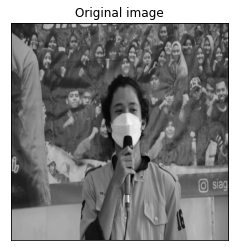

In [85]:
plt.imshow(image,cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

#PENJELASAN 

#xticks () adalah fungsi perpustakaan yang digunakan untuk menentukan titik sumbu x
#yticks () adalah fungsi perpustakaan yang digunakan untuk menentukan titik sumbu y
#Gambar dibawah merupakan hasil original gambar yang tadi sudah dimasukan.

(Text(0.5, 1.0, 'Sobel'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

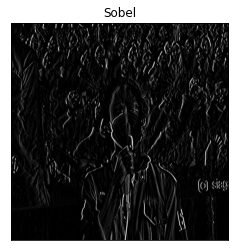

In [86]:
gradienSobelX = cv2.filter2D(image, -1, kernel_Sobel_x)
plt.imshow(gradienSobelX,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#hasil gambar dibawah yaitu hasil dari gambar yang diberi metode sobel X dengan matrix di atas dan terlihat noise pada gambar

(Text(0.5, 1.0, 'Sobel'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

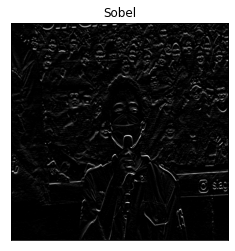

In [87]:
gradienSobelY = cv2.filter2D(image, -1, kernel_Sobel_y)
plt.imshow(gradienSobelY,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#hasil gambar dibawah yaitu hasil dari gambar yang diberi metode sobel Y dengan matrix di atas dan terlihat noise pada gambar

(Text(0.5, 1.0, 'prewitt'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

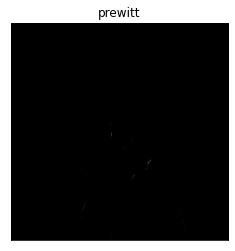

In [88]:
prewittGradienX = cv2.filter2D(image, -1, kernel_Prewitt_x)
plt.imshow(prewittGradienX,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#hasil gambar dibawah yaitu hasil dari gambar yang diberi metode Prewitt X dengan matrix di atas dan terlihat sedikit noise
#dan lebih banyak memiliki warna hitam pada gambar

(Text(0.5, 1.0, 'prewitt'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

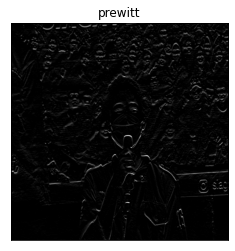

In [89]:
prewittGradienY = cv2.filter2D(image, -1, kernel_Prewitt_y)
plt.imshow(prewittGradienY,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#hasil gambar dibawah yaitu hasil dari gambar yang diberi metode Prewitt Y dengan matrix di atas dan terlihat banyak noise grey dari prewit gradien Y
#dan memiliki lebih jelas garis pada gambar

(Text(0.5, 1.0, 'Prewitt'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

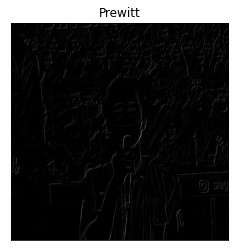

In [90]:
robertGradienX = cv2.filter2D(image, -1, kernel_Roberts_x)
plt.imshow(robertGradienX,cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#hasil gambar dibawah yaitu hasil dari gambar yang diberi metode robert X dengan matrix di atas dan terlihat sedikit noise
#dan sedikit terlihat garis tepi pada gambar dibawah

(Text(0.5, 1.0, 'Prewitt'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

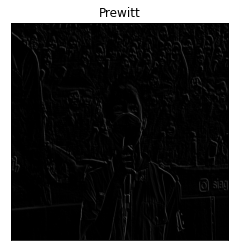

In [91]:
robertGradienY = cv2.filter2D(image, -1, kernel_Roberts_y)
plt.imshow(robertGradienY,cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#hasil gambar dibawah yaitu hasil dari gambar yang diberi metode robert dan di beri title prewitt Y dengan matrix di atas dan lebih memiliki tekstur
#pada gambar sedikit lebih jelas dari hasil sebelumnya

(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

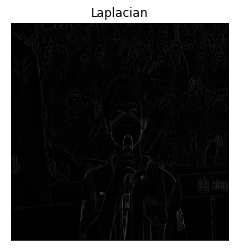

In [92]:
operatorLaplacian = cv2.filter2D(image, -1, kernel_Laplacian_1)
plt.imshow(operatorLaplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

#PENJELASAN

#fungsi filter2D() digunakan untuk mengubah nilai intensitas piksel suatu citra berdasarkan nilai intensitas piksel di sekitarnya.
#Hasil gambar dibawah yaitu dengan menggunakan metode operator laplacian dan terlihat sedikit noise yang membentuk gambar tubuh saya 
#dengan title laplacian, pada gambar di bawah masih terlihat lebih dominan warna hitam 

(Text(0.5, 1.0, 'Canny'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

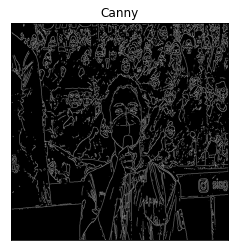

In [93]:
operatorCanny = canny(image,3,50,150)
plt.imshow(operatorCanny,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

#PENJELASAN 

#Hasil gambar pada metode dengan operator canny dan title canny yaitu gambar yang memiliki banyak garis noise di tengah dan memiliki teksture kasar 
#tapi dengan teksture yang kasar maka garis garis tepi pada gambar lebih terlihat jelas dan membentuk pola pada gambar 